<center><h1>Battle of Neighbourhoods; Finding Best Pivot Place For Cab Drivers in Berlin</h1>
<br>
<img src = 'https://www.bz-berlin.de/data/uploads/2019/04/ermany2013_1554899772.jpg' width = 800>
</center>


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 4>

1.INTRODUCTION: BUSINESS PROBLEM
    
 <a href="#item1"> Problem Description</a>

2.DATA
    
 <a href="#item1"> Data Sources/Web Scraping</a>
    
 <a href="#item2"> Data Wrangling </a>
    
 <a href="#item3"> Implementation </a> 

3.METHODOLOGY
    
  <a href="#item4">General Methodology</a>
    
 <a href="#item5">Explore Data Set/ Neighborhoods in Leuven</a>

 <a href="#item6">Analyze Each Neighborhood</a>  
   
 <a href="#item6">Machine Learning/ Cluster Neighborhoods</a>
   
4.RESULTS 
    
  <a href="#item7">Examine Clusters</a>  
   
  <a href="#item8">Analytic Results</a>   
    
5.DISCUSSION
    
  <a href="#item8">Recommendations</a>  
    
6.CONCLUSION
    
  <a href="#item8">Conclusion of the Project</a>  
    
</font>
</div>

<a id="ref0"></a>
<h1>1. INTRODUCTION: BUSINESS PROBLEM</h1>

<p style="text-align:justify">
    Berlin is the capital city of the Federal Republic of Germany. According to 2017 census data this city has approximately 3.65 million inhabitants and as far as population concerned Berlin is the biggest city in Germany. Berlin is evidently a metropole and moreover it is an overwhelming, fascinating and a growing city. Until 2030, the population of Berlin is supposed to grow around 7.5%, predominantly because of increasing migration. 
</p>
<p style="text-align:justify">
    Among the major sectors in Berlin include the tourism, the creative and cultural industries, the biotechnology and healthcare industry with medical and pharmaceutical industries, information and communication technologies, the construction and property industry, trade, optoelectronics, energy technology and Trade fair and congress industry. The city is a European hub of rail and air traffic. Berlin is one of the emerging international centers for innovative business start-ups, with high annual growth in the number of employed people. 
</p>
<p style="text-align:justify">
    Let’s think about a person who wants to dive in to taxi business in Berlin. He wants to work as a cab driver in Berlin. Since he has a limited budget, his goal is profit maximization. Because of high mobility and better standards compared to conventional taxi business, he wants to work under the organisation of ‘UBER’ or being a member of ‘MyTaxi’ organisation. We can call our friend from now on an unconventional cab driver in order to differentiate him from normal taxi drivers who are not directed from a center and generally have yellow taxis. ‘UBER’ is one of the legal and valid organisations in Germany in taxi business. Although it is sometimes controversial and prone to some limitations because of conventional taxi driver’s protest, UBER is generally available both in Germany and Berlin. Companies like MyTaxi are also providing similar service in Berlin.
</p>
<p style="text-align:justify">
    In a routine day, as part of their routine life, many people commute in Berlin. The season (sommer, winter etc), the day type (weekday or weekend) and even the time period of the day (morning, noon, afternoon, night) has great effect on the total number of German people commuting in Berlin and their movement patterns respectively. We can talk about trends when people commute in such a metropole. Biggest people movement is always observed to be mainly from accommodation places to respective working places and vice versa. And also from working place to recreation areas or venues. Weekend periods are always exceptions. People don’t work at weekends; they rest instead, and try to enjoy their free times. Therefore, they move from their respective homes to recreation areas or to possible venues available for spending time and vice versa. Sommer period is also a different case . In particular, for a touristic place like Berlin.
</p>
<p style="text-align:justify">
    Both Uber and MyTaxi work on internet based applications (over cell phone or tablet) and these applications function based on the logic of finding the closest cab driver available for any client or passenger. When someone registered to one of this companies as a cab driver; first the application is installed and then the calls for cab comes from clients over this application. And it is so evident that mobility of people influences the possibility of finding client. If a cab driver is in the right place, he can easily find a client and earn money.
</p>
<p style="text-align:justify">
    For a person working as a non-conventional cap driver minimizing the costs and maximizing the revenues is definitely the main goal. And being in the right place in the right time is the key to success in this business. A cab driver must find more clients in order to maximize the revenues and must be close to the best client source areas. We can call them live areas where people are. A cab driver can maximize profits by staying within a certain distance of the most live venues or recreation areas. Moreover, a predetermined center or pivot point that a cab driver has to return after each trip with client is quite logical to find more clients. Finding the best pivot neighbourhood for cab drivers will really help this labor group. This pivot area can basically be defined as the area with biggest number of venues such as restaurants, cinemas, theatres, hotels, museums, parks, working places etc. Because venues are serving people.
</p>
<p style="text-align:justify">
    There may of course be other factors in effect such as the number of people living in this neighbourhood and the number of people working there. Moreover, public transportation service availability is also a factor for the revenues of non-conventional cab drivers. But in general one can state that people around venues need cabs to move to different places. We have an optimisation problem at hand and in order to find the best borough or neighbourhood for any cab driver as a pivot area to turn around, we need to segment and cluster the city of Berlin based on Foursquare API data. In addition, in order to find best client source, we need to find the top rated venues and calculate the total number of venues in each cluster.
</p>
<p style="text-align:justify">
There are 12 boroughs (Charlottenburg-Wilmersdorf, Friedrichshain-Kreuzberg, Lichtenberg, Marzahn-Hellersdorf,Mitte, Neukölln, Pankow, Reinickendorf, Spandau, Steglitz-Zehlendorf, Tempelhof-Schöneberg, Treptow-Köpenick) and 96 neighbourhoods in city of Berlin. Determining the right area (borough or neighbourhood) is our goal and we will use a Machine Learning algorithm to segment and cluster the neighbourhoods. Finally, we will make a recommendation to our cab drivers as a solution to their pivot area finding problem.
</p>

<p style="text-align:justify">
<a id="ref0b"></a>
<h2>2. DATA</h2>
   <h2> a. Data Sources/ Web Scraping</h2>

   Due to difficulty of working in neighbourhood level in such a metropole, insignificance of finding a pivot solution for a taxi based on neighbourhoods and unavailability of some portion of neighbourhood level data for Berlin; segmenting and clustering analysis in this study is performed on BOROUGH level. Coordinates of borough zipcodes are used to find number of venues within a defined area. Venue requests are made based on borough information and mainly following data sources are used. The location data consists of the boroughs, their zipcodes, and coordinates . I have scraped that data from 2 web pages (http://www.statistik-berlin-brandenburg.de/produkte/verzeichnisse/zuordnungderbezirkezupostleitzahlen.xls and https://raw.githubusercontent.com/TrustChainEG/postal-codes-json-xml-csv/master/data/DE/zipcodes.de.csv)and acquired necessary info. Zipcodes served as the index and refer to coordinates, borough names, etc. And I used location data in Github to describe the shape and centers of the boroughs as it is in geojson format(https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson).  
</p>
<h2>   b. Data Wrangling </h2>

   After some data processing and wrangling I had below data format. All of these processess will be explained later. 
    
   #### ZipCode/  State/    Latitude/  Longitude/  Borough/ 
   #### 10115  /  Berlin/   52.5323/   13.3846 /   Mitte/

   Later, I created a map of Berlin with all boroughs and zipcodes of all neighbourhoods superimposed on them by using folio.This data is combined with Foursquare API data. I explored the areas around the collected zipcodes(postal codes)
in Berlin. Therewith, I perform location search and gather the most famous venues within a circle of 2000 meters radius for each zipcode. By doing so I will try to cover almost all areas within a specific borough. Four square data looked like below. As a result, I got 13600 total venues and 373 unique categories in the data set. 
    
   #### ZipCode/  Zipcode Latitude/  Zipcode Longitude/ Venue      /	Venue Latitude/	Venue Longitude/ Venue Category/ 
   #### 14119/    52.4777        /   3.2951           / Erlenbush  /   52.46433      /	13.303959      / Park /

   The parameters “radius” and “number of venues” are reasonable choices for finding number of venues within all boroughs. Yelp API provides data concerning top-rated venues at given coordinates. This information might interest cab drivers since those venues are place of attractions for cab clients. Further, to obtain a systematic view on the structure of the boroughs, a cluster analysis facilitated a comparison of the locations. Therefore, the venues and their categories were collected at each zipcode in order to compare the relative frequencies of venues per category at each zipcode. 
</p>
   These frequencies of venues per category, called "category feature" serve as a measurement of dissimilarity of 
distinct locations. The cluster analysis groups locations with similar "category features" into a cluster and separates locations with more diverse features. 
</p>

   #### ZipCode/ATM/Adult Butique/African Restaurant/Airport Service/American Restaurant/Animal Shelter/Antique Shop/Aquarim/Argentinian Restaurant/Vietnamese Restaurant/Volleyball Court/Waterfront/Whisky Bar/Wine Bar/Wine Shop/Winery/Women's Store/Yoga Studio/Zoo Exhibit/    
   #### 10115/0.00/0.00/0.00/0.00/0.00/0.00/0.00/0.00/0.00/0.020000/0.02/0.0/0.0/0.020000/0.00/0.0/0.0/0.00/0.0/

   A dendrogram shows the distances between the "category features" in order to determine the number of clusters. Therewith, a hierarchical cluster algorithm provides the cluster labels for the zipcodes. These derivers cluster of similar locations within boroughs of Berlin.
</p>
<h2> c. Implementation</h2>

In [50]:
# importing libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from bs4 import BeautifulSoup
import requests # library to handle requests
import urllib.request
from urllib.parse import quote # handle irregular strings
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy.geocoders # convert an address into latitude and longitude values


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter

# import k-means from clustering stage
from sklearn.cluster import KMeans

# supporting libaries
import csv
import shutil
from IPython.display import display, HTML, Image

print('Libraries are imported.')

Libraries are imported.


Zipcodes are the main indexes, the data refers to. If multiple boroughs contain the same zipcode, the first linkage between a borough an a zipcode retains. All remaining links were deleted.For deleted zipcode see the comment '#' in each line.

Since Berlin is a huge city and there are so many data as far as venues concerned and for the sake of simplicity, I choosed to work with the borough located in the center of Berlin which is called 'Mitte'.   

Swap the format. Change borough-zipcode into zipcode-borough and for duplicate copys:

In [51]:

Berlin_Borough = {
'Mitte': [13347, 13355, 13357, 13359, 13409, 10555, 10557, 10551, 10553, 10555, 10557, 10559, 13353, 10115, 10117, 10119, 10178, 10179, 10551, 10553, 10555, 10557, 10559, 10785, 10787, 10963, 13353, 13347, 13349, 13351, 13353, 13355, 13357, 13359, 13405, 13407, 13409],
'Friedrichshain-Kreuzberg': [10243, 10245, 10247, 10249, 10367, 10961, 10965, 10967, 10997, 10999, 12045],# 10179, 10785, 10963, 10969
'Pankow': [10405, 10407, 10409, 10437, 10439, 13051, 13053, 13086, 13088, 13089, 13125, 13127, 13129, 13156, 13158, 13159, 13187, 13189], #10119, 10247, 10249, 10435
'Charlottenburg-Wilmersdorf': [10585, 10587, 10589, 10625, 10627, 10629, 10707, 10709, 10711, 10713, 10715, 10717, 10719, 10777, 10779, 10789, 10825, 13597, 13627, 13629, 14050, 14052, 14053, 14055, 14057, 14059, 14193, 14195, 14197, 14199], #10553, 10623, 10787, 13353
'Spandau': [13581, 13583, 13585, 13587, 13589, 13591, 13593, 13595, 13599, 14089],# 13597, 13627, 13629, 14052
'Steglitz-Zehlendorf': [12157, 12161, 12163, 12165, 12167, 12169, 12203, 12205, 12207, 12209, 12247, 12249, 12277, 12279, 14109, 14129, 14163, 14165, 14167, 14169],#14193, 14195, 14197, 14199
'Tempelhof-Schöneberg': [10781, 10783, 10823, 10827, 10829, 12099, 12101, 12103, 12105, 12107, 12109, 12159, 12305, 12307, 12309, 12347],#10777, 10779, 10789, 10825, 10965, 12157, 12161, 12163, 12169, 10785, 10787, 12249, 12277, 12279, 14197
'Neukölln': [12043, 12047, 12049, 12051, 12053, 12055, 12057, 12059, 12349, 12351, 12353, 12355, 12357, 12359], #10967, 12045, 12099, 12107, 10965, 12305, 12347
'Treptow-Köpenick': [12435, 12437, 12439, 12459, 12487, 12489, 12524, 12526, 12527, 12555, 12557, 12559, 12587, 12589, 12623],
'Marzahn-Hellersdorf': [12619, 12621, 12627, 12629, 12679, 12681, 12683, 12685, 12687, 12689],#12555, 12623
'Lichtenberg': [10315, 10317, 10318, 10319, 10365, 10369, 13055, 13057, 13059], #10367, 13051, 13053
'Reinickendorf': [13403, 13435, 13437, 13439, 13465, 13467, 13469, 13503, 13505, 13507, 13509],#13405, 13407, 13409, 13599, 13629
}

In [52]:
Zip, Bor = [], []
for k,vals in Berlin_Borough.items():
    #print (k,vals)
    for v in vals:
        Zip.append( v)
        Bor.append( k)
    
Berlin_Borough = pd.DataFrame( {'Zipcode':Zip, 'Borough': Bor} )
Berlin_Borough.to_pickle('./Berlin_Borough.pkl')

Duplett = Berlin_Borough.groupby(by='Zipcode', as_index=False).count()
print ('Multiple identical pairs of zips and boroughs  - duplicate copys:')
display ( Duplett[Duplett['Borough']>=2] )

Multiple identical pairs of zips and boroughs  - duplicate copys:


,Zipcode,Borough
21,10551,2
22,10553,2
23,10555,3
24,10557,3
25,10559,2
137,13347,2
140,13353,3
141,13355,2
142,13357,2
143,13359,2


The following data source provides the central coordinates for zipcodes (see: http://www.geonames.org/postal-codes/DE/BE/berlin.html, I use the Github):

In [53]:
Berlin_Coordinate = pd.read_csv('https://raw.githubusercontent.com/TrustChainEG/postal-codes-json-xml-csv/master/data/DE/zipcodes.de.csv')
Berlin_Coordinate.to_pickle('./Germany_Zipcodes.pkl')
Berlin_Coordinate.head()

,country_code,zipcode,place,state,state_code,province,province_code,community,community_code,latitude,longitude
0,DE,1945,Grünewald,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4000,14.0000
1,DE,1945,Lindenau,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4000,13.7333
2,DE,1945,Hohenbocka,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4310,14.0098
3,DE,1945,Schwarzbach,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4500,13.9333
4,DE,1945,Guteborn,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4167,13.9333


The following transformations filter data, extract relevant columns and rows, and joins DataFrames:

In [54]:
Berlin_Coordinate = pd.read_pickle('./Germany_Zipcodes.pkl')
Berlin_Borough = pd.read_pickle('./Berlin_Borough.pkl')

Berlin_Coordinate.drop( columns=['country_code','place','province','province_code','state_code','community','community_code'], inplace=True) # drop unrelevant columns
Berlin_Coordinate = Berlin_Coordinate [ (Berlin_Coordinate['zipcode']>=10115) & (Berlin_Coordinate['zipcode']<=14199) ] # drop unrelevant zipcodes in rows: https://en.wikipedia.org/wiki/List_of_postal_codes_in_Germany#Berlin
Berlin_Coordinate.dropna(axis=0, inplace=True) # drop rows with missing values

Berlin_mapped = Berlin_Coordinate.join( Berlin_Borough.set_index('Zipcode'), on='zipcode', how='inner', sort=True)
Berlin_mapped.reset_index(drop = True, inplace = True)
Berlin_mapped.to_pickle('./Berlin_Zipcodes.pkl')
Berlin_mapped.head(20)

,zipcode,state,latitude,longitude,Borough
0,10115,Berlin,52.5323,13.3846,Mitte
1,10117,Berlin,52.5170,13.3872,Mitte
2,10119,Berlin,52.5305,13.4053,Mitte
3,10178,Berlin,52.5213,13.4096,Mitte
4,10179,Berlin,52.5122,13.4164,Mitte
5,10243,Berlin,52.5123,13.4394,Friedrichshain-Kreuzberg
6,10245,Berlin,52.5007,13.4647,Friedrichshain-Kreuzberg
7,10247,Berlin,52.5161,13.4656,Friedrichshain-Kreuzberg
8,10249,Berlin,52.5238,13.4428,Friedrichshain-Kreuzberg
9,10315,Berlin,52.5132,13.5148,Lichtenberg


Some descriptive statistics for plausibility checks:

In [55]:
Berlin_mapped = pd.read_pickle('./Berlin_Zipcodes.pkl')
Berlin_mapped.describe(include='all')

,zipcode,state,latitude,longitude,Borough
count,201.000000,201,201.000000,201.000000,201
unique,NaN,1,NaN,NaN,12
top,NaN,Berlin,NaN,NaN,Mitte
freq,NaN,201,NaN,NaN,37
mean,12220.721393,NaN,52.506793,13.385227,NaN
std,1254.834791,NaN,0.053505,0.107186,NaN
min,10115.000000,NaN,52.385600,13.140500,NaN
25%,10785.000000,NaN,52.470400,13.319500,NaN
50%,12355.000000,NaN,52.509500,13.371400,NaN
75%,13353.000000,NaN,52.541600,13.448600,NaN


The following geojson-file contains the limiting coordinates for the twelve boroughs:

In [56]:
url = 'https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson'

# save geojson-file in working directory
with urllib.request.urlopen(url) as response, open('berliner-bezirke.geojson', 'wb') as Borough_Json:
    shutil.copyfileobj(response, Borough_Json)

Draw a map of Berlin and highlight boroughs and their zipcodes:

In [57]:
Borough_Json = r'berliner-bezirke.geojson' # geojson file

# get coordinates of Berlin to center the map
location = Nominatim().geocode('Berlin, Germany') # as the center of the following map, convert the address of Toronto into latitude and longitude values

figM1 = plt.figure()

# plain map of Berlin
Map_Berlin = folium.Map(location=[location.latitude, location.longitude], zoom_start=10)

# use choropleth to highlight boroughs
Map_Berlin.choropleth(
    geo_data=Borough_Json,
    key_on='features.properties.spatial_alias', #  see geojson for path
    fill_color='yellow', 
    legend_name='Zipcodes and Boroughs in Berlin',
    highlight = True,
    line_color ='black'
)

# add markers to the map
markers_colors = []
for lat, lon, poi, bor in zip(
     Berlin_mapped['latitude'],
     Berlin_mapped['longitude'],
     Berlin_mapped['zipcode'],
     Berlin_mapped['Borough']
):
    label = folium.Popup('Borough: {}, Zipcode: {}'.format(bor, poi ) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(Map_Berlin)

''' OLD
folium.CircleMarker(
    location=[52.64, 13.71],
    radius=5,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='yellow'
).add_to(Map_Berlin)
'''

Map_Berlin

<Figure size 432x288 with 0 Axes>



<a id="ref22"></a>
<h2>2. Explore venue</h2>

Initialize the Foursquare API to explore venues at the coordinates of zipcodes:

In [58]:
# Credentials are bind to my specific Foursquare app

CLIENT_ID = 'SBZBKTDIEMO5ZAHM2QCFIUE4MGTQOSSMBPL11PGIISK2WVCE' # your Foursquare ID
CLIENT_SECRET = 'AOX0B1NZQIZ4NU4QOZ0YNK4HV4PWARWE4YTPMGVNJ4Z3UBJQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: SBZBKTDIEMO5ZAHM2QCFIUE4MGTQOSSMBPL11PGIISK2WVCE
CLIENT_SECRET:AOX0B1NZQIZ4NU4QOZ0YNK4HV4PWARWE4YTPMGVNJ4Z3UBJQ


Use a function to collect the data at zipcodes with specific coordinates:

In [59]:
def get_nearby_venues(names, latitudes, longitudes, radius=2000):
    
    name_list = []
    lat_list = []
    lng_list = []
    venue_name_list = []
    venue_lat_list = []
    venue_lng_list = []
    venue_cat_list = []
    limit = 100
    print( 'Zipcode, Latitude, Longitude:' )
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print( str(name) +', '+  str(lat) +', '+ str(lng) )
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # return only relevant information for each nearby venue
        # the structure is given by Foursquare
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
            for v in results:
                name_list.append( name )
                lat_list.append( lat )
                lng_list.append( lng )
                venue_name_list.append( v['venue']['name'] )
                venue_lat_list.append( v['venue']['location']['lat'] )
                venue_lng_list.append( v['venue']['location']['lng'] ) 
                venue_cat_list.append( v['venue']['categories'][0]['name'] )
                
        except:
            pass
    print('-------Requested all zipcodes--------')
    
    # build DataFrame with zipcode as key and the collected venues
    nearby_venues = pd.DataFrame( {
        'Zipcode': name_list, 
        'Zipcode Latitude': lat_list, 
        'Zipcode Longitude': lng_list, 
        'Venue': venue_name_list, 
        'Venue Latitude': venue_lat_list, 
        'Venue Longitude': venue_lng_list, 
        'Venue Category': venue_cat_list } )
    
    return(nearby_venues)

Apply the function to obtain up to 100 venues at each zipcode and extract the venue categories.

In [60]:
Berlin_Venues = get_nearby_venues( 
    Berlin_mapped.loc[:,'zipcode'],
    Berlin_mapped.loc[:,'latitude'],
    Berlin_mapped.loc[:,'longitude'],
    radius=2000)
Berlin_Venues
Berlin_Venues.to_pickle('./Berlin_Venues.pkl')

Zipcode, Latitude, Longitude:
10115, 52.5323, 13.3846
10117, 52.516999999999996, 13.3872
10119, 52.5305, 13.4053
10178, 52.5213, 13.4096
10179, 52.5122, 13.4164
10243, 52.5123, 13.4394
10245, 52.5007, 13.4647
10247, 52.5161, 13.4656
10249, 52.5238, 13.4428
10315, 52.5132, 13.5148
10317, 52.4979, 13.4908
10318, 52.4835, 13.5287
10319, 52.4992, 13.5188
10365, 52.5206, 13.4969
10367, 52.5246, 13.4821
10369, 52.5295, 13.4695
10405, 52.5352, 13.4257
10407, 52.5336, 13.4492
10409, 52.5443, 13.4414
10437, 52.5449, 13.4126
10439, 52.5522, 13.4121
10551, 52.5307, 13.3372
10551, 52.5307, 13.3372
10553, 52.5305, 13.3215
10553, 52.5305, 13.3215
10555, 52.5215, 13.3355
10555, 52.5215, 13.3355
10555, 52.5215, 13.3355
10557, 52.5233, 13.3594
10557, 52.5233, 13.3594
10557, 52.5233, 13.3594
10559, 52.5301, 13.3499
10559, 52.5301, 13.3499
10585, 52.5152, 13.3057
10587, 52.5184, 13.3195
10589, 52.5276, 13.3057
10625, 52.5095, 13.3147
10627, 52.508, 13.302999999999999
10629, 52.5028, 13.3086
10707, 52.496

Some descriptive statistics for the venues:

In [61]:
Berlin_Venues = pd.read_pickle('Berlin_Venues.pkl')
Berlin_Venues_grouped = Berlin_Venues.groupby('Zipcode').count()

print('There are {0} total venues, and {1} uniques categories.'.format( \
    Berlin_Venues_grouped['Venue'].sum(), len( Berlin_Venues['Venue Category'].unique()) ))
print ()
print('Some example venues in Berlin:')
display( Berlin_Venues.loc[0:4,['Zipcode', 'Venue', 'Venue Category']] )
print ()
print('Descriptive statistics for plausibility checks:')
display( Berlin_Venues.describe(include='all') )


There are 14662 total venues, and 377 uniques categories.

Some example venues in Berlin:


,Zipcode,Venue,Venue Category
0,10115,Hotel i31,Hotel
1,10115,Oslo Kaffebar,Coffee Shop
2,10115,Brasserie La Bonne Franquette,Brasserie
3,10115,+84,Vegetarian / Vegan Restaurant
4,10115,19grams,Coffee Shop



Descriptive statistics for plausibility checks:


,Zipcode,Zipcode Latitude,Zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,14662.000000,14662.000000,14662.000000,14662,14662.000000,14662.000000,14662
unique,NaN,NaN,NaN,4219,NaN,NaN,377
top,NaN,NaN,NaN,Lidl,NaN,NaN,Café
freq,NaN,NaN,NaN,211,NaN,NaN,937
mean,11944.913245,52.507090,13.376408,NaN,52.506792,13.376720,NaN
std,1296.719798,0.043012,0.085137,NaN,0.041752,0.083326,NaN
min,10115.000000,52.385600,13.140500,NaN,52.373572,13.116225,NaN
25%,10627.000000,52.478500,13.325700,NaN,52.481999,13.326176,NaN
50%,12103.000000,52.509500,13.362400,NaN,52.507889,13.364068,NaN
75%,13347.000000,52.537200,13.428500,NaN,52.534442,13.427597,NaN


<a id="ref23"></a>
<h2>3. Preprocess venues</h2>


At first, transform the DataFrame of venues in several steps:

In [62]:
# one hot encoding: 1 if venue in category, zero otherwise
Berlin_onehot = pd.get_dummies( Berlin_Venues [['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Berlin_onehot['Zipcode'] = Berlin_Venues['Zipcode']

# move zipcode column to the first column
fixed_columns = [Berlin_onehot.columns[-1]] + list(Berlin_onehot.columns[:-1])
Berlin_onehot = Berlin_onehot[fixed_columns]

Create the new DataFrame and display the top 10 venue categories per zipcode, measured by the relative frequency of venues per category

In [63]:
Berlin_grouped = Berlin_onehot.groupby('Zipcode').mean().reset_index()
Berlin_grouped.head()


,Zipcode,ATM,Adult Boutique,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Bratwurst Joint,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal,Candy Store,Capitol Building,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Rec Center,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Currywurst Joint,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Field,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Industrial Estate,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kofte Place,Korean Restaurant,Kumpir Restaurant,Kurdish Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Lawyer,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lottery Retailer,Lounge,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Palace,Palatine Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pide Place,Pie Shop,Pier,Piercing Parlor,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rest Area,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Rugby Stadium,Russian Restaurant,Salad Place,Salon / Barbershop

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [65]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues: "1st, 2nd, 3rd, 4th ...
columns = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Zipcode'] = Berlin_grouped['Zipcode']

# sort venues per Neighbourhood
for ind in np.arange(Berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,Coffee Shop,Italian Restaurant,Hotel,Ice Cream Shop,Art Gallery,Cocktail Bar,Bakery,Sandwich Place,Bookstore,Restaurant
1,10117,Hotel,History Museum,Plaza,Bookstore,Clothing Store,Art Museum,Chocolate Shop,Concert Hall,Historic Site,Theater
2,10119,Coffee Shop,Hotel,Beer Bar,Italian Restaurant,Bookstore,Ice Cream Shop,Cocktail Bar,Café,Indie Movie Theater,French Restaurant
3,10178,Hotel,Ice Cream Shop,Coffee Shop,Indie Movie Theater,Italian Restaurant,History Museum,Café,Bookstore,Optical Shop,Clothing Store
4,10179,Hotel,Coffee Shop,Bar,Indie Movie Theater,History Museum,Italian Restaurant,Café,Wine Bar,Art Museum,Burger Joint
5,10243,Italian Restaurant,Café,Bakery,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bar,Nightclub,Hotel,Hostel,Record Shop
6,10245,Café,Nightclub,Gym / Fitness Center,Bar,Ice Cream Shop,Falafel Restaurant,Coffee Shop,Rock Club,Bookstore,Athletics & Sports
7,10247,Café,Pizza Place,Coffee Shop,Bar,Falafel Restaurant,Ice Cream Shop,Bookstore,Vegetarian / Vegan Restaurant,German Restaurant,Thai Restaurant
8,10249,Italian Restaurant,Café,Middle Eastern Restaurant,Vietnamese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Wine Bar,Hotel,Nightclub,Music Venue
9,10315,Supermarket,Bakery,Zoo Exhibit,Drugstore,Tram Station,Bus Stop,Hotel,Coffee Shop,Park,Gym / Fitness Center


<a id="ref24"></a>
<h2>4. Cluster neighborhoods</h2>

### K-elbow Method to find optimum k

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

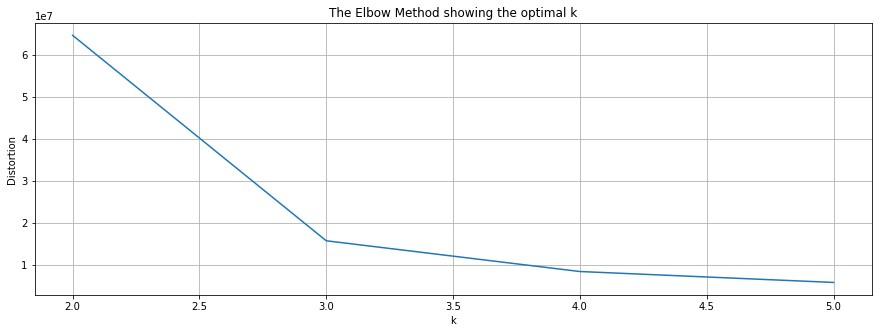

In [66]:
# clustering dataset
# determine k using elbow method
   
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = Berlin_grouped.drop('Neighborhood', 1) # <your_data>
distorsions = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 6), distorsions)
plt.grid(True)
#plt.title('Elbow curve')   
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

When K increases, the centroids are closer to the clusters centroids.
Here the distortion, mean sum of squared distances to centers, decreases to the optimum point.
The improvements will decline, at some point rapidly, creating the elbow shape.
That point is the optimal value for k. In the image above, k=3.

### Run k-means to Cluster Neighborhoods into 3 Clusters

In [67]:
# import k-means from clustering stage
from sklearn.cluster import KMeans


# set number of clusters
kclusters = 3

Berlin_grouped_clustering = Berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Calculate the distances between feature vectore of the zipcodes and show a **Dendrogram** as a hierarchical view of possible cluster. The dendrogram plots de distances between zipcodes:

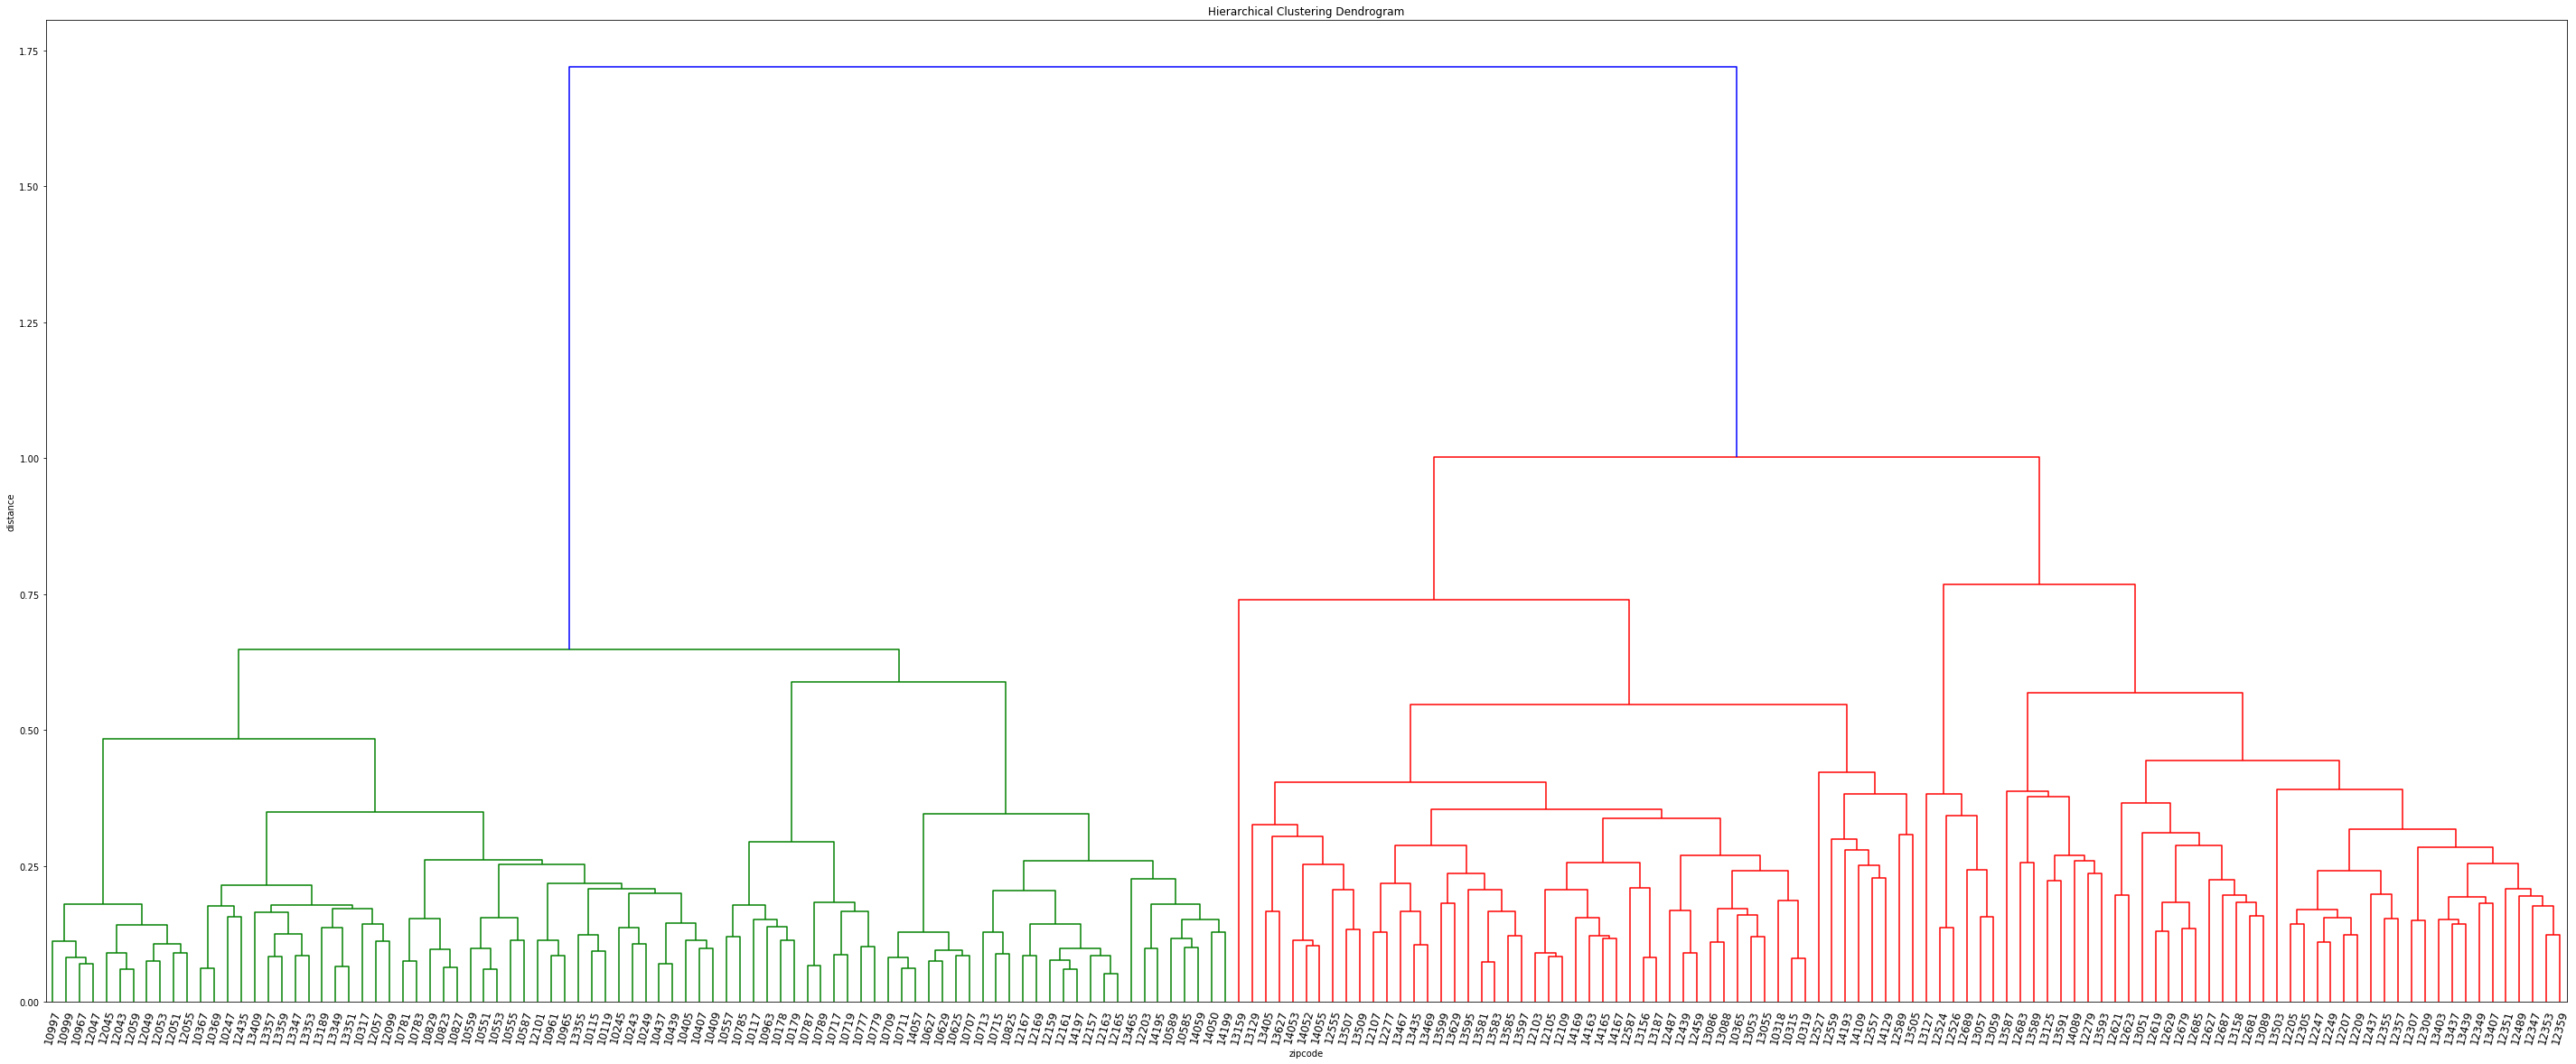

In [68]:
%matplotlib inline

Berlin_grouped_clustering = Berlin_grouped.drop('Zipcode', 1)

linkage_matrix = linkage(Berlin_grouped_clustering, 'ward')

# calculate full dendrogram
plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('zipcode')
plt.ylabel('distance')

#from IPython.core.debugger import Tracer; 
# Tracer()()
dendrogram(
    linkage_matrix,
    #p=30, truncate_mode='lastp',
    labels=list ( Berlin_grouped['Zipcode']) ,
    leaf_rotation=75,  # rotates the x axis labels
    leaf_font_size=12  # font size for the x axis labels
    )

# double-click to maximize or minimize the plot
#fig = plt.gcf()
plt.show()

The dendogram shows a specific hierarchical structure. For a sparse parametrization, I use seven clusters (count the vertical lines at some offset over the horizotal line). I decided for two large green clusters (on the left in the dendrogram) and five red clusters (on the right in the dendrogram). With this number of clusters, I run the hierarchical cluster analysis to label each zipcode with a cluster-label of one to seven.

In [69]:
# generate cluster labels
k=3 # number of Clusters
labels = fcluster(linkage_matrix, k, criterion='maxclust')

# add clustering labels
Berlin_merged = pd.DataFrame(Berlin_grouped.loc[:,['Zipcode']]) #i.O.
Berlin_merged['Cluster Labels'] = labels

# combine with sorted venues dataframe
Berlin_merged = Berlin_merged.join( Berlin_mapped.loc[:,['zipcode','latitude','longitude','Borough']].set_index('zipcode'), on='Zipcode').join( neighborhoods_venues_sorted.set_index('Zipcode'),on='Zipcode')

Berlin_merged.head(10)

,Zipcode,Cluster Labels,latitude,longitude,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,1,52.5323,13.3846,Mitte,Coffee Shop,Italian Restaurant,Hotel,Ice Cream Shop,Art Gallery,Cocktail Bar,Bakery,Sandwich Place,Bookstore,Restaurant
1,10117,1,52.5170,13.3872,Mitte,Hotel,History Museum,Plaza,Bookstore,Clothing Store,Art Museum,Chocolate Shop,Concert Hall,Historic Site,Theater
2,10119,1,52.5305,13.4053,Mitte,Coffee Shop,Hotel,Beer Bar,Italian Restaurant,Bookstore,Ice Cream Shop,Cocktail Bar,Café,Indie Movie Theater,French Restaurant
3,10178,1,52.5213,13.4096,Mitte,Hotel,Ice Cream Shop,Coffee Shop,Indie Movie Theater,Italian Restaurant,History Museum,Café,Bookstore,Optical Shop,Clothing Store
4,10179,1,52.5122,13.4164,Mitte,Hotel,Coffee Shop,Bar,Indie Movie Theater,History Museum,Italian Restaurant,Café,Wine Bar,Art Museum,Burger Joint
5,10243,1,52.5123,13.4394,Friedrichshain-Kreuzberg,Italian Restaurant,Café,Bakery,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bar,Nightclub,Hotel,Hostel,Record Shop
6,10245,1,52.5007,13.4647,Friedrichshain-Kreuzberg,Café,Nightclub,Gym / Fitness Center,Bar,Ice Cream Shop,Falafel Restaurant,Coffee Shop,Rock Club,Bookstore,Athletics & Sports
7,10247,1,52.5161,13.4656,Friedrichshain-Kreuzberg,Café,Pizza Place,Coffee Shop,Bar,Falafel Restaurant,Ice Cream Shop,Bookstore,Vegetarian / Vegan Restaurant,German Restaurant,Thai Restaurant
8,10249,1,52.5238,13.4428,Friedrichshain-Kreuzberg,Italian Restaurant,Café,Middle Eastern Restaurant,Vietnamese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Wine Bar,Hotel,Nightclub,Music Venue
9,10315,2,52.5132,13.5148,Lichtenberg,Supermarket,Bakery,Zoo Exhibit,Drugstore,Tram Station,Bus Stop,Hotel,Coffee Shop,Park,Gym / Fitness Center


As the dendrogram shows for example, the zipcodes "10115", "10117" and "10119" are part of the secound-green cluster (see the zipcode in the dendrogram). This table shows in column "Cluster Labels", that three zipcodes ("10115", "10117" and "10119") are clustered into the second cluster-label, as expected.

<a id="ref25"></a>
<h2>5. Examine clusters</h2>

<a id="ref3"></a>
<h1>Part 3 - Analysis</h1>

The following map visualizes the distribution of clustered zipcodes Berlin:


In [70]:
Borough_Json = r'berliner-bezirke.geojson' # geojson file

# create a plain map of Berlin
location = Nominatim().geocode('Berlin, Germany') # as the center of the following map, convert the address of Toronto into latitude and longitude values

Map_Berlin_clustered = folium.Map(location=[location.latitude, location.longitude], zoom_start=10.2)


Map_Berlin_clustered.choropleth(
    geo_data=Borough_Json,
    key_on='features.properties.spatial_alias', #  PFAD im geojson JavaScript!!!!
    fill_color='YlGn', 
    legend_name='City of Berlin and clustered venues',
    highlight = True,
    line_color ='black'
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, clu, bor in zip(
     Berlin_merged['latitude'],
     Berlin_merged['longitude'],
     Berlin_merged['Zipcode'],
     Berlin_merged['Cluster Labels'],
     Berlin_merged['Borough']
):
    label = folium.Popup('Borough: {}, Zipcode: {}, Cluster {},  '.format(bor, poi, clu ) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[clu-1],
        fill=True,
        fill_color=rainbow[clu-1],
        fill_opacity=0.7
    ).add_to(Map_Berlin_clustered)
       
Map_Berlin_clustered

The map of the clustered locations show some geographical structure. I suggest to double-click and zoom in the map.

*Cluster 1* and *Cluster 2* (purple, blue) lie in the center of Berlin - predominantly more in the east respectively in the west. 
*Cluster 3* (cyan) is mainly located in southwest. 
Cluster 4* and *Cluster 6* (bright green, orange) are outside of the inner circle. *Cluster 5* (dark yellow) spands from the north over the east to the south - outside the inner circle, and *Cluster 7* is singular in the north.
Several clusters comprise multiple boroughs such as *Cluster 6* (orange), that contains zipcodes in Reinickendorf, Pankow, Lichtenberg, etc.

#### Describe the clusters

In this section, we present the clusters and determine the venues categories that distinguish the cluster.

In [71]:
# create structure for ranked venue categories
# created columns with ranked names
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues: "1st, 2nd, 3rd, 4th ...
columns_ranked = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns_ranked.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns_ranked.append('{}th Most Common Venue'.format(ind+1))
columns_ranked


def get_ranked_venues( columns_ranked, Berlin_onehot, Clusterer_Zipcode ):
    
    # make one-hot encoding for venues in cluster
    Berlin_grouped_temp = Berlin_onehot [ Berlin_onehot['Zipcode'].isin( Clusterer_Zipcode ) ].groupby('Zipcode').mean().reset_index()
    
    # create a new dataframe with same zipcodes
    Cluster_ranked_venues = pd.DataFrame(columns=columns_ranked)
    Cluster_ranked_venues['Zipcode'] = Berlin_grouped_temp[ 'Zipcode']

    # rank venues by frequency
    for ind in np.arange(Berlin_grouped_temp.shape[0]):
        Cluster_ranked_venues.iloc[ind, 1:] = return_most_common_venues( Berlin_grouped_temp.iloc[ind, :], num_top_venues)

    return Cluster_ranked_venues


def show_popular_venues( Cluster_Label, Berlin_merged):

    # extract zipcode in cluster and get ranked venue categories by frequency 
    Cluster = Berlin_merged.loc[Berlin_merged['Cluster Labels'] == LABEL, Berlin_merged.columns[[0] + list(range(4, 14))]]
    
    # call the get_ranked_venues function
    Cluster_ranked_venues = get_ranked_venues( columns_ranked, Berlin_onehot, Cluster['Zipcode'] )

    # extract modes of ranked venues and delete nan
    top_venues  = [] 
    for row in Cluster_ranked_venues.mode(axis=0).copy().drop(columns = 'Zipcode').drop_duplicates().iterrows():
        top_venues.extend ( row[1].values )
    top_venues = [item for item in top_venues if type(item)==str]#

    # remove duplicates and order alphabetical
    top_venues = list ( sorted( set( top_venues )) )

    # show characteristic venues and survey of top ten venues of Cluster
    
    print ('Cluster{} contains {} zipcodes.\n'.format(LABEL, len( Cluster['Zipcode']) ))
    print ('The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):\n {}'.format( top_venues) )
    print ()
    print ('Show individual top ten venues categories in cluster{}:'.format(LABEL) )
    print ()
    display ( Cluster_ranked_venues )
    return Cluster_ranked_venues, top_venues

### Results: Cluster1 (Blue):

Cluster1 lies in the middle of Berlin, and one might expect more venues for tourism, food, coffee, etc.

In [72]:
# Clusters = list[index][properties] as data structure for custers.\
# Index-1 is the lael of a cluster, properties are: 
# cluster label number,
# a dataframe with zipcodes and venues, 
# and a set of most frequent venue categories

Clusters = []

LABEL = 1
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster1 contains 102 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Café', 'Ice Cream Shop', 'Italian Restaurant', 'Park', 'Restaurant', 'Trattoria/Osteria', 'Vietnamese Restaurant', 'Wine Bar']

Show individual top ten venues categories in cluster1:



,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,Coffee Shop,Italian Restaurant,Hotel,Ice Cream Shop,Art Gallery,Cocktail Bar,Bakery,Sandwich Place,Bookstore,Restaurant
1,10117,Hotel,History Museum,Plaza,Bookstore,Clothing Store,Art Museum,Chocolate Shop,Concert Hall,Historic Site,Theater
2,10119,Coffee Shop,Hotel,Beer Bar,Italian Restaurant,Bookstore,Ice Cream Shop,Cocktail Bar,Café,Indie Movie Theater,French Restaurant
3,10178,Hotel,Ice Cream Shop,Coffee Shop,Indie Movie Theater,Italian Restaurant,History Museum,Café,Bookstore,Optical Shop,Clothing Store
4,10179,Hotel,Coffee Shop,Bar,Indie Movie Theater,History Museum,Italian Restaurant,Café,Wine Bar,Art Museum,Burger Joint
5,10243,Italian Restaurant,Café,Bakery,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bar,Nightclub,Hotel,Hostel,Record Shop
6,10245,Café,Nightclub,Gym / Fitness Center,Bar,Ice Cream Shop,Falafel Restaurant,Coffee Shop,Rock Club,Bookstore,Athletics & Sports
7,10247,Café,Pizza Place,Coffee Shop,Bar,Falafel Restaurant,Ice Cream Shop,Bookstore,Vegetarian / Vegan Restaurant,German Restaurant,Thai Restaurant
8,10249,Italian Restaurant,Café,Middle Eastern Restaurant,Vietnamese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Wine Bar,Hotel,Nightclub,Music Venue
9,10317,Café,Bar,Bakery,Supermarket,Italian Restaurant,Drugstore,Nightclub,Coffee Shop,Vietnamese Restaurant,Music Venue


The modes show the most frequent venue categories per rank over all zipcode without duplicates. Famous venues categories are: 'Bakery', 'Bar', 'Café', 'Ice Cream Shop' ... For details see table "Top ten venue categories".

### Results: Cluster2 (Green):

Cluster2 lies in the middle of Berlin like Cluster1. As the dendrogram implies, Cluster1 and Cluster2 share some specific similarities and have specific dissimmilarities.

In [73]:
LABEL = 2
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster2 contains 51 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Beach', 'Café', 'Drugstore', 'German Restaurant', 'Hotel', 'Italian Restaurant', 'Park', 'Restaurant', 'Supermarket']

Show individual top ten venues categories in cluster2:



,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10315,Supermarket,Bakery,Zoo Exhibit,Drugstore,Tram Station,Bus Stop,Hotel,Coffee Shop,Park,Gym / Fitness Center
1,10318,Supermarket,Drugstore,Tram Station,Italian Restaurant,Pool,Zoo Exhibit,Stables,History Museum,Theme Park,Greek Restaurant
2,10319,Supermarket,Drugstore,Zoo Exhibit,Bakery,Hotel,Tram Station,Bus Stop,Italian Restaurant,Pizza Place,Asian Restaurant
3,10365,Supermarket,Bakery,Tram Station,Coffee Shop,Drugstore,Pizza Place,Hotel,Park,Asian Restaurant,Vietnamese Restaurant
4,12103,Supermarket,Café,Park,Gym / Fitness Center,Bakery,Drugstore,Doner Restaurant,Italian Restaurant,Ice Cream Shop,Restaurant
5,12105,Supermarket,Park,Café,Drugstore,Bus Stop,Bakery,Italian Restaurant,Ice Cream Shop,Asian Restaurant,Fried Chicken Joint
6,12107,Supermarket,Italian Restaurant,Steakhouse,Park,Fried Chicken Joint,Chinese Restaurant,Restaurant,Garden,Drugstore,Lottery Retailer
7,12109,Supermarket,Café,Drugstore,Bakery,Park,Italian Restaurant,Harbor / Marina,Indian Restaurant,Ice Cream Shop,Shopping Mall
8,12277,Supermarket,Bus Stop,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Big Box Store,Steakhouse,Light Rail Station,Restaurant,Diner
9,12439,Supermarket,Café,Playground,Falafel Restaurant,Movie Theater,History Museum,Soccer Field,Snack Place,Drugstore,Train Station


The mode shows the most frequent venue categories per rank over all zipcode without duplicates. 

Let's find the simmilarities and dissimmilarities of Cluster1 and Cluster2. For details see table "Top ten venues categories" regarding  Cluster2.

### Results: Cluster 3 (light green):

Cluster4 and Cluster6 encompass the center of Berlin. For both venues, more venue categories concerning living, household, sport, etc. are expected to characterize these areas.

In [76]:
LABEL = 3
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster3 contains 48 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Big Box Store', 'Bus Stop', 'Clothing Store', 'Drugstore', 'Electronics Store', 'Farm', 'Fast Food Restaurant', 'German Restaurant', 'Greek Restaurant', 'Grocery Store', 'Hotel', 'Italian Restaurant', 'Park', 'Pet Store', 'Supermarket', 'Zoo Exhibit']

Show individual top ten venues categories in cluster3:



,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12205,Supermarket,Bus Stop,Italian Restaurant,Café,Drugstore,Bakery,Food & Drink Shop,Ice Cream Shop,German Restaurant,Big Box Store
1,12207,Supermarket,Bakery,Drugstore,Light Rail Station,Pet Store,Big Box Store,Bus Stop,Organic Grocery,Café,Fast Food Restaurant
2,12209,Supermarket,Bakery,Bus Stop,Fast Food Restaurant,Light Rail Station,Drugstore,Café,Organic Grocery,Italian Restaurant,Park
3,12247,Supermarket,Bus Stop,Park,Organic Grocery,Drugstore,Italian Restaurant,Pool,Bakery,Gym,Chinese Restaurant
4,12249,Supermarket,Bus Stop,Italian Restaurant,Drugstore,Restaurant,Chinese Restaurant,Bakery,Organic Grocery,Indoor Play Area,Grocery Store
5,12279,Supermarket,Bus Stop,Italian Restaurant,Fast Food Restaurant,Park,Clothing Store,Taverna,Big Box Store,Soccer Field,Farm
6,12305,Supermarket,Bus Stop,Italian Restaurant,Big Box Store,Soccer Field,Fast Food Restaurant,Tennis Court,Doner Restaurant,Bakery,Light Rail Station
7,12307,Supermarket,Doner Restaurant,Bus Stop,German Restaurant,Bakery,Flower Shop,Tea Room,Mobile Phone Shop,Soccer Field,Gas Station
8,12309,Supermarket,Doner Restaurant,Soccer Field,Italian Restaurant,Bus Stop,Mexican Restaurant,Mobile Phone Shop,Gym / Fitness Center,Tennis Court,Bakery
9,12347,Supermarket,Historic Site,Café,Italian Restaurant,Bakery,Gas Station,Sculpture Garden,Liquor Store,Pet Store,Doner Restaurant


The venue categories differ from cluster1 or cluster2. Some typical venue categories are: 'Bus Stop', 'Gas Station', 'Baby Store', 'Bakery', 'Café', 'Drugstore', 'Supermarket'
That supports the expectation. Now consider Cluster6:

<a id="ref27"></a>
<h2>7. Explore top rated venues</h2>

In [77]:
def get_top_venue(names, latitudes, longitudes, boroughs):
    
    API_KEY= '7ck9FFncp_Txch8yQlU1SINYI3ZPBkirqsa04kEKAodHh79szVNnfxAIFvl7Yc4GAkYKO7PfYMPeUjY3F2DqgvDCZ8oGjl3yaYVpoJOOlq8QcLJK_Acu25SPXUnGW3Yx'
    
    API_HOST = 'https://api.yelp.com'
        
    SEARCH_PATH = '/v3/businesses/search'
    
    url = '{0}{1}'.format(API_HOST, quote(SEARCH_PATH.encode('utf8')))
    
    html= "<table> <tr><td rowspan='5'><a href={Url} target='_blank'><img src={Img_Url} width='100'/> </a> </td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Name}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Adresse}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Rating}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Kategorie}</td></tr></table>"

    url_params = {
        'latitude': 0, 
        'longitude': 0,
        'radius': 1000,
        'sort_by': 'rating',
        'limit': 3, #'attributes': 'hot_and_new',
        }

    for name, lat, lng, bor in zip(names, latitudes, longitudes, boroughs):
        try:
            url_params['latitude'] =  lat
            url_params['longitude'] = lng
            response = requests.request('GET', url, headers={'Authorization': 'Bearer %s' % API_KEY,}, params=url_params)
            results =  response.json()
            Label = '<H3>Top venues in "{}" for zipcode {}:</H3>'.format(bor, name)
            display(HTML( Label ))
            for v in results['businesses']:
                datatable='<p>'
                datatable += html.format(
                    Url = str(v['url']), 
                    Img_Url = str(v['image_url']), 
                    Name = '<b>Name:</b> ' + str(v['name']), 
                    Adresse='<b>Address:</b> ' + ', '.join(v['location']['display_address']), 
                    Rating='<b>Rating:</b> ' + str( v['rating'] ),
                    Kategorie='<b>Category:</b> ' + str(v['categories'][0]['title']) )
                display(HTML(datatable))
        except:
            print ('Yelp returned top rated venues for zip.'.format(name))
            print ()
        print('-'*40) 
    return datatable

In [78]:
Berlin_selected = Berlin_mapped[2:5] # sparse use of API, volume constraint

display(HTML('<H2>Survey of top rated venues</H2><p>Click image to open the link!<p>'))

Selected_top_venues = get_top_venue( 
    Berlin_selected.loc[:,'zipcode'],
    Berlin_selected.loc[:,'latitude'],
    Berlin_selected.loc[:,'longitude'],
    Berlin_selected.loc[:,'Borough'])

#Selected_top_venues.to_pickle('./Selected_top_venues.pkl')

""
Name: Berlin Cathedral
"Address: Am Lustgarten, 10178 Berlin, Germany"
Rating: 4.5
Category: Landmarks & Historical Buildings


""
Name: Pergamon Museum
"Address: Bodestr. 1 - 3, 10178 Berlin, Germany"
Rating: 4.5
Category: Museums


""
Name: Deutsches Historisches Museum
"Address: Unter den Linden 2, 10117 Berlin, Germany"
Rating: 4.5
Category: Museums


----------------------------------------


""
Name: Brauereigaststätte Leibhaftig
"Address: Metzer Str. 30, 10405 Berlin, Germany"
Rating: 5.0
Category: Breweries


""
Name: Berlin Cathedral
"Address: Am Lustgarten, 10178 Berlin, Germany"
Rating: 4.5
Category: Landmarks & Historical Buildings


""
Name: Lucky Leek
"Address: Kollwitzstr. 54, 10405 Berlin, Germany"
Rating: 4.5
Category: Vegan


----------------------------------------


""
Name: Fräulein Wild
"Address: Dresdener Str. 13, 10999 Berlin, Germany"
Rating: 4.5
Category: Cafes


""
Name: Soy
"Address: Rosa-Luxemburg-Str. 30, 10178 Berlin, Germany"
Rating: 4.5
Category: Vietnamese


""
Name: KONAK GRILL - iZMiR KÖFTECiSi
"Address: Reichenberger Str. 10, 10999 Berlin, Germany"
Rating: 4.5
Category: Turkish


----------------------------------------


<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3d"></a>
<h2>D. Results</h2>

This section summariezes the results of the analysis of the neighborhood regarding the following aspects:
1. Geographic features of Berlin
2. Venues and clusters in neighborhoods
3. Socio-demographic features
4. Trending venues

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
#### 4. Trending venues

For the reason of consistency, we extract trending venues at each zipcode in "Charlottenbourg-Wilmersdorf" and "Spandau":

In [79]:
Selected_zipcodes1 = Berlin_mapped.loc[Berlin_mapped.Borough=='Mitte', :]
Selected_zipcodes1 = Selected_zipcodes1.head(3)
Selected_zipcodes1

,zipcode,state,latitude,longitude,Borough
0,10115,Berlin,52.5323,13.3846,Mitte
1,10117,Berlin,52.5170,13.3872,Mitte
2,10119,Berlin,52.5305,13.4053,Mitte


In [80]:
display(HTML('<H2>Survey in "Charlottenburg-Wilmersdorf" of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes1.loc[:,'zipcode'],
    Selected_zipcodes1.loc[:,'latitude'],
    Selected_zipcodes1.loc[:,'longitude'],
    Selected_zipcodes1.loc[:,'Borough']);

""
Name: Berlin Wall Memorial
"Address: Bernauer Str. 111 - 119, 13355 Berlin, Germany"
Rating: 5.0
Category: Museums


""
Name: Yarok
"Address: Torstr. 195, 10115 Berlin, Germany"
Rating: 4.5
Category: Syrian


""
Name: Marral
"Address: Torstr. 222, 10115 Berlin, Germany"
Rating: 4.5
Category: Middle Eastern


----------------------------------------


""
Name: Gendarmenmarkt
"Address: Mohrenstr. 30, 10117 Berlin, Germany"
Rating: 4.5
Category: Landmarks & Historical Buildings


""
Name: Lorenz Adlon Esszimmer
"Address: Unter den Linden 77, 10117 Berlin, Germany"
Rating: 5.0
Category: Modern European


""
Name: Yarok
"Address: Torstr. 195, 10115 Berlin, Germany"
Rating: 4.5
Category: Syrian


----------------------------------------


""
Name: Berlin Cathedral
"Address: Am Lustgarten, 10178 Berlin, Germany"
Rating: 4.5
Category: Landmarks & Historical Buildings


""
Name: Pergamon Museum
"Address: Bodestr. 1 - 3, 10178 Berlin, Germany"
Rating: 4.5
Category: Museums


""
Name: Deutsches Historisches Museum
"Address: Unter den Linden 2, 10117 Berlin, Germany"
Rating: 4.5
Category: Museums


----------------------------------------


In [82]:
Selected_zipcodes2 = Berlin_mapped.loc[Berlin_mapped.Borough=='Friedrichshain-Kreuzberg', :]
Selected_zipcodes2 = Selected_zipcodes2.head(3)
Selected_zipcodes2

,zipcode,state,latitude,longitude,Borough
5,10243,Berlin,52.5123,13.4394,Friedrichshain-Kreuzberg
6,10245,Berlin,52.5007,13.4647,Friedrichshain-Kreuzberg
7,10247,Berlin,52.5161,13.4656,Friedrichshain-Kreuzberg


In [83]:
display(HTML('<H2>Survey in "Friedrichshain-Kreuzberg" of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes2.loc[:,'zipcode'],
    Selected_zipcodes2.loc[:,'latitude'],
    Selected_zipcodes2.loc[:,'longitude'],
    Selected_zipcodes2.loc[:,'Borough']);

""
Name: Rembrandt-Burger
"Address: Richard-Sorge-Str. 21, 10249 Berlin, Germany"
Rating: 4.5
Category: Burgers


""
Name: Burgermeister
"Address: Oberbaumstr. 8, 10997 Berlin, Germany"
Rating: 4.0
Category: Fast Food


""
Name: Berlin Wall - East Side Gallery
"Address: Mühlenstr. 3 - 100, 10243 Berlin, Germany"
Rating: 4.5
Category: Landmarks & Historical Buildings


----------------------------------------


""
Name: Ali Baba
"Address: Krossener Str. 17, 10245 Berlin, Germany"
Rating: 4.5
Category: Lebanese


""
Name: Matreshka
"Address: Boxhagener Str. 60, 10245 Berlin, Germany"
Rating: 4.5
Category: Russian


""
Name: Louise Chérie Café
"Address: Grünberger Str. 91, 10245 Berlin, Germany"
Rating: 4.5
Category: Cafes


----------------------------------------


""
Name: Ali Baba
"Address: Krossener Str. 17, 10245 Berlin, Germany"
Rating: 4.5
Category: Lebanese


""
Name: Matreshka
"Address: Boxhagener Str. 60, 10245 Berlin, Germany"
Rating: 4.5
Category: Russian


""
Name: Louise Chérie Café
"Address: Grünberger Str. 91, 10245 Berlin, Germany"
Rating: 4.5
Category: Cafes


----------------------------------------


These information about trending venues are a good starting point to find a pivot area for a cab driver. 

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3e"></a>
<h2>E. Discussion</h2>

<p style="text-align:justify">
The results of the cluster analysis concerning the structures of venues and the comparison of socio-demographic features show clear interpretation. This can be related to distinct areas in Berlin. The clusters do not correspond to the shape of the boroughs. But the distribution of the clustered areas have a plausible interpretation. We can separate clusters in the inner circle of Berlin from clusters outside this circle. Nevertheless, some clusters have rare data points that might indicate outliers. From a technical point of view, the Foursquare API promises the delivery of "trending venues". An earlier implementation showed no outcomes. Therefore we utilize the Yelp API in order to obtain top rated venues at given zipcodes. This supports people who are about to move to specific locations in Berlin.

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3f"></a>
<h2>F. Conclusion</h2>

<p style="text-align:justify">
This project illustrates how measures of data science support a systematic analysis of neighborhoods. For the analysis we implement arious data sources and analysis methods. The results show differences in a lot of respects.
A hierarchical cluster analysis classifies zipcodes into seven distinct clusters. A cluster is grouped by zipcodes with  a similar structure of venues. A comparison of clusters show clear differences in the venues structures that can be related to specific areas in Berlin. Further, this project implements several external data sources to describe important socio-demographic features for each borough, such as rate of unemployment, rate of academics, number of physicians per inhabitant, and prices for buying apartments. Further, we consider the examples  "Charlottenbourg-Wilmersdorf" and "Spandau" as boroughs of Berlin. The main interpretation of the analyzed features indicates different levels of wealthiness and standard of living. As the project problem is clearly not a comparison of locations in several respects. The task of the project is to support peoples who consider moving to Berlin. If such a subject finds a suitable selection of possible locations, this project supports by showing top rated venues for those locations. The next step is to engage the service of a real-estate or letting agent to find a place to live.